In [1]:
import nbimporter
%run readin.ipynb
%run ../ms_functions.ipynb

ERROR:root:File `'programs/readin.ipynb.py'` not found.


In [2]:
file = "../data/proteinGroups_MS3_simplified.txt"
data = readin(file)

In [3]:
technical_replicates = {"Cell Line 1":[0,1,2],"Cell Line 2":[3,4,5]}
neg_col = 7
boost_col = 9

In [4]:
samples = by_sample(data, technical_replicates)
neg_cont = data.iloc[:,neg_col]
boost=data.iloc[:,boost_col]

In [5]:
thrs = n_thresholds(neg_cont)['with_zeros']

95% threshold: 350.74

Ignoring Zeros: 
95% threshold: 847.72


In [6]:
upper = n_thresholds(data.iloc[:,boost_col])

95% threshold: 517880.0

Ignoring Zeros: 
95% threshold: 572350.0


In [7]:
def extremes(trip):
    low = True
    high = True
    for i in trip:
        if i > 325: low=False
        if i < 10000: high=False
    if low: return "low"
    if high: return 'High'
    return False

In [8]:
rep1 = samples['Cell Line 1']
rep2 = samples['Cell Line 2']

to_use = {}

for index, row in rep1.iterrows():
    row2 = rep2.loc[index]
    r1 = extremes(row)
    r2 = extremes(row2)
    if r2 and r1:
        if r1 != r2:
            to_use[index] = {}
            to_use[index][1] = list(row)
            to_use[index][2] = list(row2)
            print (index)
            print (row)
            print ()
            print (row2)
            print ('\n\n\n')

sp|P29351|PTN6_MOUSE
Reporter intensity corrected 0 MS3_1    0.0
Reporter intensity corrected 1 MS3_1    0.0
Reporter intensity corrected 2 MS3_1    0.0
Name: sp|P29351|PTN6_MOUSE, dtype: float64

Reporter intensity corrected 3 MS3_1    27240.0
Reporter intensity corrected 4 MS3_1    29533.0
Reporter intensity corrected 5 MS3_1    31586.0
Name: sp|P29351|PTN6_MOUSE, dtype: float64




sp|P37889|FBLN2_MOUSE
Reporter intensity corrected 0 MS3_1    12865.0
Reporter intensity corrected 1 MS3_1    12945.0
Reporter intensity corrected 2 MS3_1    14881.0
Name: sp|P37889|FBLN2_MOUSE, dtype: float64

Reporter intensity corrected 3 MS3_1     0.000
Reporter intensity corrected 4 MS3_1    40.825
Reporter intensity corrected 5 MS3_1     0.000
Name: sp|P37889|FBLN2_MOUSE, dtype: float64




sp|Q61553|FSCN1_MOUSE
Reporter intensity corrected 0 MS3_1    21082.0
Reporter intensity corrected 1 MS3_1    20991.0
Reporter intensity corrected 2 MS3_1    19546.0
Name: sp|Q61553|FSCN1_MOUSE, dtype: float64

R

95.00% of neg cont is below dashed line.
92.49% of sample data is above the dashed line.
86.21% of boost data is above the dashed line.
100.00% of neg cont is below dotted line.
5.00% of sample data is above the dotted line.
44.92% of boost data is above the dotted line.


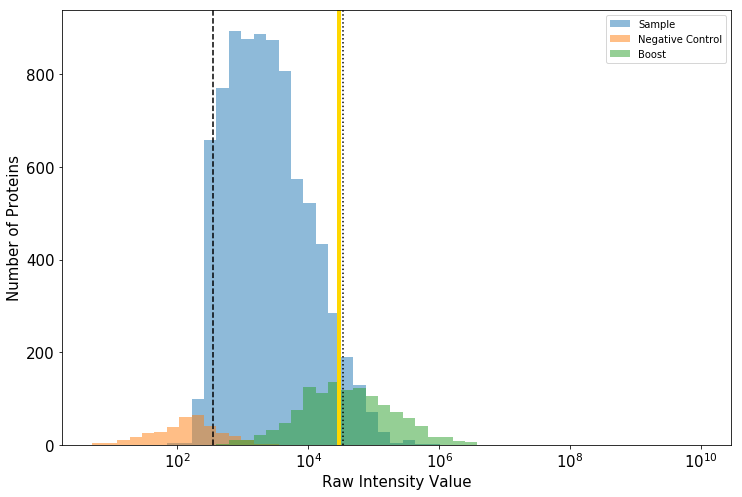

95.00% of neg cont is below dashed line.
92.49% of sample data is above the dashed line.
86.21% of boost data is above the dashed line.
100.00% of neg cont is below dotted line.
5.00% of sample data is above the dotted line.
44.92% of boost data is above the dotted line.


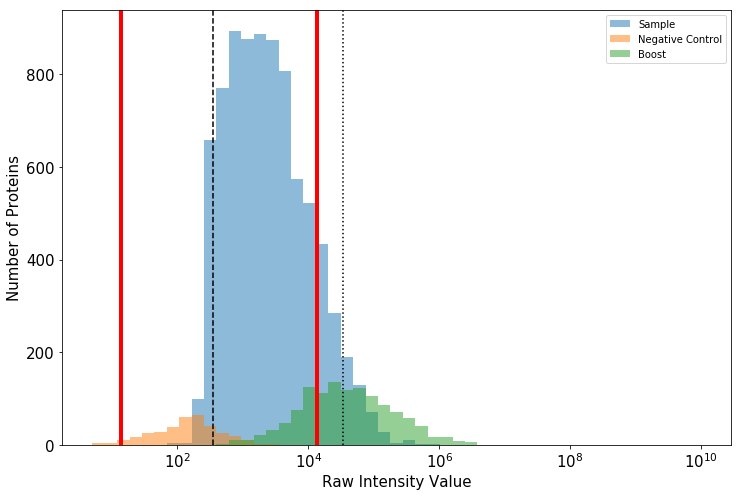

95.00% of neg cont is below dashed line.
92.49% of sample data is above the dashed line.
86.21% of boost data is above the dashed line.
100.00% of neg cont is below dotted line.
5.00% of sample data is above the dotted line.
44.92% of boost data is above the dotted line.


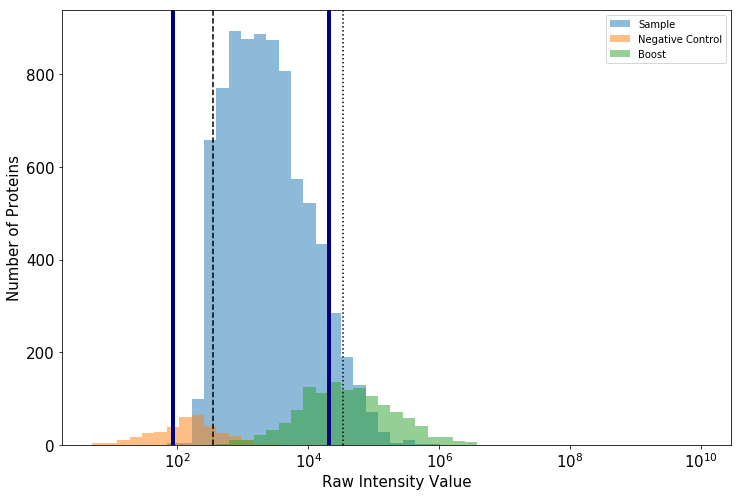

In [15]:
#Compared to the rest of the data
colors=['gold','red', 'navy']
line_sets = []
c=0
for protein in to_use:
    this_set =[]
    for triplicate in to_use[protein]:
        values = (to_use[protein][triplicate])
        val = mean(values)
        kwargs = dict(x=val, lw=4, color=colors[c])
        line_sets.append(kwargs)
        this_set.append(kwargs)
    c+=1
    technical_replicates = {'Sample':[0,1,2,3,4,5,6,8]}
    samples_data = by_sample(data, technical_replicates)
    graphed_types(samples_data, neg_cont, boost, control_percent = 95, sample_percent = 95,
              lines=this_set, title="")

Comparing to the rest of the data:

95.00% of neg cont is below dashed line.
92.49% of sample data is above the dashed line.
86.21% of boost data is above the dashed line.
100.00% of neg cont is below dotted line.
5.00% of sample data is above the dotted line.
44.92% of boost data is above the dotted line.


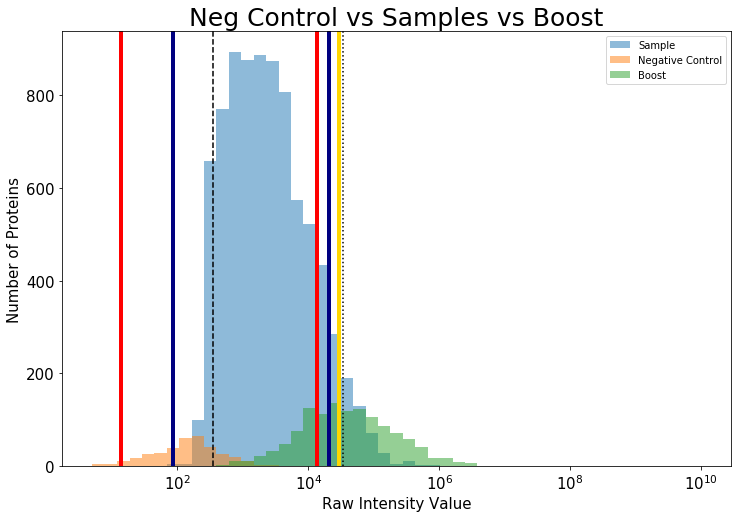

In [10]:
technical_replicates = {'Sample':[0,1,2,3,4,5,6,8]}
samples_data = by_sample(data, technical_replicates)
graphed_types(samples_data, neg_cont, boost, control_percent = 95, sample_percent = 95, lines=line_sets)

In [11]:
line_sets

[{'x': 0.0, 'lw': 4, 'color': 'gold'},
 {'x': 29453.0, 'lw': 4, 'color': 'gold'},
 {'x': 13563.666666666666, 'lw': 4, 'color': 'red'},
 {'x': 13.608333333333334, 'lw': 4, 'color': 'red'},
 {'x': 20539.666666666668, 'lw': 4, 'color': 'navy'},
 {'x': 86.80333333333334, 'lw': 4, 'color': 'navy'}]